## Facial Landmarks

In [6]:
import cv2
import dlib
import numpy as np
from matplotlib import pyplot as plt

See blog post here - https://matthewearl.github.io/2015/07/28/switching-eds-with-python/


#### Install Instructions for dlib

- Download and Install Dlib

https://sourceforge.net/projects/dclib/

- Extract files in C:/dlib 
- Use command prompt to Cd to folder and run “python setup.py install”

#### Download the pre-trained model here 

http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2

- Place this file in your default ipython notebook folder


In [7]:
PREDICTOR_PATH = "shape_predictor_68_face_landmarks.dat"

In [8]:
predictor = dlib.shape_predictor(PREDICTOR_PATH)
detector = dlib.get_frontal_face_detector()

In [12]:
class TooManyFaces(Exception):
    pass

class NoFaces(Exception):
    pass

def get_landmarks(im):
    rects = detector(im, 1)

    if len(rects) > 1:
        raise TooManyFaces
    if len(rects) == 0:
        raise NoFaces
    return np.matrix([[p.x, p.y] for p in predictor(im, rects[0]).parts()])

In [13]:
def annotate_landmarks(im, landmarks):
    im = im.copy()
    for idx, point in enumerate(landmarks):
        pos = (point[0, 0], point[0, 1])
        cv2.putText(im, str(idx), pos,
                    fontFace=cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,
                    fontScale=0.4,
                    
                    color=(0, 0, 255))
        cv2.circle(im, pos, 3, color=(0, 255, 255))
    return im

In [14]:
image = cv2.imread('Obama.jpg')
landmarks = get_landmarks(image)
image_with_landmarks = annotate_landmarks(image, landmarks)

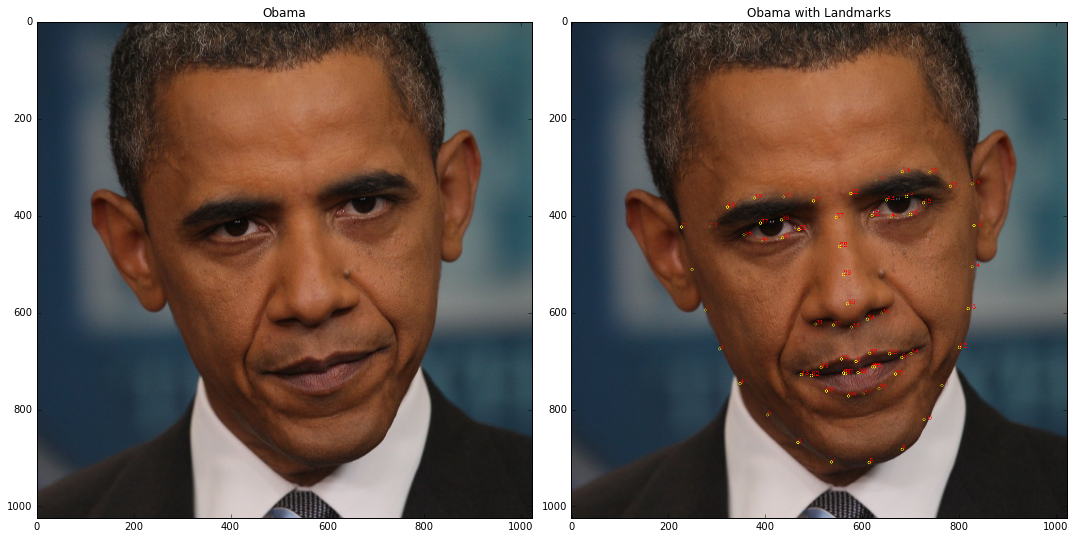

In [17]:
row, col = 1, 2
fig, axs = plt.subplots(row, col, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Obama')
cv2.imwrite('Obama.jpg', image)

axs[1].imshow(cv2.cvtColor(image_with_landmarks, cv2.COLOR_BGR2RGB))
axs[1].set_title('Obama with Landmarks')
cv2.imwrite('image_with_landmarks.jpg', image)

plt.show()